In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df = pd.read_csv('income.csv')

In [2]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


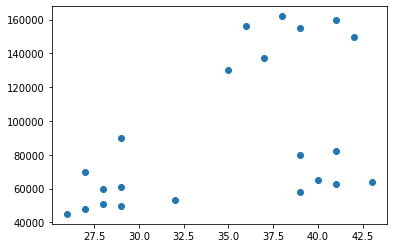

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


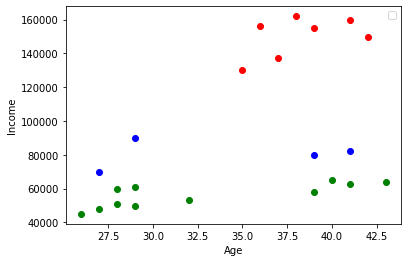

In [7]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
# as you can see there is no arrangement of points because x and y scale are at a mojor difference
# to avoid this we use minmaxscaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()
# this givees a scale of between 0-1

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [10]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [11]:
df['cluster1'] = y_pred
df.drop('cluster',axis=1,inplace=True)
df.head()

,Name,Age,Income($),cluster1
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [12]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

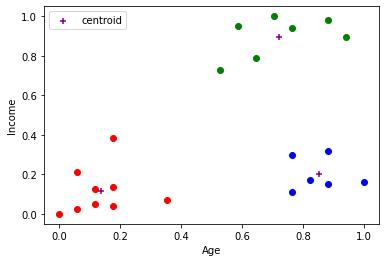

In [13]:
df1=df[df.cluster1==0]
df2=df[df.cluster1==1]
df3=df[df.cluster1==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [14]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.27612937677853544,
 0.22443334487241415,
 0.1738164100643029,
 0.13265419827245162,
 0.10663983840905439]

Text(0, 0.5, 'SSE')

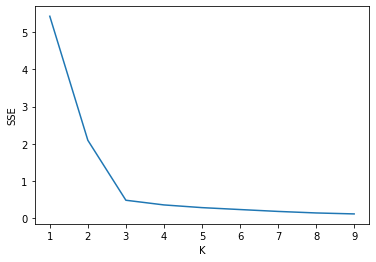

In [15]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('SSE')
# by this we get k=3 by elbow point